In [268]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import copy
from models_exp import LongRangeDNN_FC
from utils import get_features, get_labels, subsample_data, normalize_features, reconstruct_2d, printMatrix, binarize, zscore, get_2D, plot_prediction, change_scale 
#from sklearn.preprocessing import MinMaxScaler, StandardScaler
#from dragonn.models import Model, SequenceDNN
#from keras.models import Sequential
#from keras.callbacks import Callback, EarlyStopping
#from keras.layers.core import (
#    Activation, Dense, Dropout, Flatten,
#    Permute, Reshape, TimeDistributedDense
#)
#from keras.layers.convolutional import Convolution2D, MaxPooling2D
#from keras.layers.recurrent import GRU
#from keras.regularizers import l1

#from deeplift import keras_conversion as kc
#from deeplift.blobs import MxtsMode

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [269]:
data_path='/users/mtaranov/NN_all_data/'

X_train = get_features('/users/mtaranov/NN_thres5max_datasets/dist_matched/X_train_thres_10.npy')
y_train = get_labels('/users/mtaranov/NN_thres5max_datasets/dist_matched/y_train_thres_10.npy')
X_valid = get_features('/users/mtaranov/NN_thres5max_datasets/dist_matched/X_valid_thres_10.npy')
y_valid = get_labels('/users/mtaranov/NN_thres5max_datasets/dist_matched/y_valid_thres_10.npy')
X_test = get_features('/users/mtaranov/NN_thres5max_datasets/dist_matched/X_test_thres_10.npy')
y_test = get_labels('/users/mtaranov/NN_thres5max_datasets/dist_matched/y_test_thres_10.npy')

"""
X_train = get_features(data_path+'train_set_upperTriangle_noDiag_reads.npy')
y_train = get_labels(data_path+'labels_train_upperTriangle_noDiag.npy')
X_valid = get_features(data_path+'vali_set_upperTriangle_noDiag_reads.npy')
y_valid = get_labels(data_path+'labels_vali_upperTriangle_noDiag.npy')
X_test = get_features(data_path+'test_set_upperTriangle_noDiag_reads.npy')
y_test = get_labels(data_path+'labels_test_upperTriangle_noDiag.npy')

X_train = get_features('NN_datasets/train_set_all_reads.npy')
y_train = get_labels('NN_datasets/labels_train_all.npy')
X_valid = get_features('NN_datasets/vali_set_all_reads.npy')
y_valid = get_labels('NN_datasets/labels_vali_all.npy')
X_test = get_features('NN_datasets/test_set_all_reads.npy')
y_test = get_labels('NN_datasets/labels_test_all.npy')

X_train_subsampled, y_train_subsampled = subsample_data(X_train, y_train)
X_valid_subsampled, y_valid_subsampled = subsample_data(X_valid, y_valid)
X_test_subsampled, y_test_subsampled = subsample_data(X_test, y_test)
"""

"\nX_train = get_features(data_path+'train_set_upperTriangle_noDiag_reads.npy')\ny_train = get_labels(data_path+'labels_train_upperTriangle_noDiag.npy')\nX_valid = get_features(data_path+'vali_set_upperTriangle_noDiag_reads.npy')\ny_valid = get_labels(data_path+'labels_vali_upperTriangle_noDiag.npy')\nX_test = get_features(data_path+'test_set_upperTriangle_noDiag_reads.npy')\ny_test = get_labels(data_path+'labels_test_upperTriangle_noDiag.npy')\n\nX_train = get_features('NN_datasets/train_set_all_reads.npy')\ny_train = get_labels('NN_datasets/labels_train_all.npy')\nX_valid = get_features('NN_datasets/vali_set_all_reads.npy')\ny_valid = get_labels('NN_datasets/labels_vali_all.npy')\nX_test = get_features('NN_datasets/test_set_all_reads.npy')\ny_test = get_labels('NN_datasets/labels_test_all.npy')\n\nX_train_subsampled, y_train_subsampled = subsample_data(X_train, y_train)\nX_valid_subsampled, y_valid_subsampled = subsample_data(X_valid, y_valid)\nX_test_subsampled, y_test_subsampled = 

In [270]:
X_train_normalized, X_valid_normalized, X_test_normalized = normalize_features(X_train, X_valid, X_test)

#X_train_normalized_subsampled, y_train_subsampled = subsample_data(X_train_normalized, y_train)
#X_valid_normalized_subsampled, y_valid_subsampled = subsample_data(X_valid_normalized, y_valid)
#X_test_normalized_subsampled, y_test_subsampled = subsample_data(X_test_normalized, y_test)

#X_train_scaled_subsampled, y_train_subsampled = subsample_data(X_train_scaled, y_train)
#X_valid_scaled_subsampled, y_valid_subsampled = subsample_data(X_valid_scaled, y_valid)
#X_test_scaled_subsampled, y_test_subsampled = subsample_data(X_test_scaled, y_test)


In [271]:
X_train_pairs = X_train_normalized.reshape(X_train_normalized.shape[0],X_train_normalized.shape[2]*X_train_normalized.shape[3])
X_valid_pairs = X_valid_normalized.reshape(X_valid_normalized.shape[0],X_valid_normalized.shape[2]*X_valid_normalized.shape[3])
X_test_pairs = X_test_normalized.reshape(X_test_normalized.shape[0],X_test_normalized.shape[2]*X_test_normalized.shape[3])

# without distance

In [455]:
from models_exp import LongRangeDNN_FC
dnn_normalized = LongRangeDNN_FC(num_features=20, use_deep_CNN=False)

In [456]:
#validation_data = (X_valid_normalized_subsampled[:, :, :10, :], y_valid_subsampled)
#dnn_normalized.train(X_train_normalized_subsampled[:, :, :10, :], y_train_subsampled, validation_data)
validation_data = (X_valid_pairs[:,:20], y_valid)
dnn_normalized.train(X_train_pairs[:,:20], y_train, validation_data)

Training model...
Train on 1212 samples, validate on 622 samples
Epoch 1/100
1000/1212 [=======================>......] - ETA: 0s - loss: 9.3836Epoch 0: validation loss: 7.956
Balanced Accuracy: 50.00%	 auROC: 0.502	 auPRC: 0.747	 auPRG: -0.002
Recall at 5%|10%|20% FDR: 0.0%|0.0%|0.0%	 Num Positives: 311	 Num Negatives: 311	 

1212/1212 [==============================] - 0s - loss: 10.4783 - val_loss: 7.9560
Epoch 2/100
1000/1212 [=======================>......] - ETA: 0s - loss: 15.9743Epoch 1: validation loss: 7.956
Balanced Accuracy: 50.00%	 auROC: 0.502	 auPRC: 0.747	 auPRG: -0.002
Recall at 5%|10%|20% FDR: 0.0%|0.0%|0.0%	 Num Positives: 311	 Num Negatives: 311	 

1212/1212 [==============================] - 0s - loss: 15.9424 - val_loss: 7.9560
Epoch 3/100
1000/1212 [=======================>......] - ETA: 0s - loss: 15.6873Epoch 2: validation loss: 7.956
Balanced Accuracy: 50.00%	 auROC: 0.502	 auPRC: 0.747	 auPRG: -0.002
Recall at 5%|10%|20% FDR: 0.0%|0.0%|0.0%	 Num Positives: 31

In [457]:
print(dnn_normalized.test(X_test_pairs[:, :20], y_test))

Balanced Accuracy: 50.00%	 auROC: 0.500	 auPRC: 0.746	 auPRG: -0.000
Recall at 5%|10%|20% FDR: 0.0%|0.0%|0.0%	 Num Positives: 243	 Num Negatives: 243	 


In [458]:
print(dnn_normalized.test(X_train_pairs[:, :20], y_train))

Balanced Accuracy: 50.00%	 auROC: 0.504	 auPRC: 0.748	 auPRG: -0.004
Recall at 5%|10%|20% FDR: 0.0%|0.0%|0.0%	 Num Positives: 606	 Num Negatives: 606	 


In [459]:
print(dnn_normalized.test(X_valid_pairs[:,:20], y_valid))

Balanced Accuracy: 50.00%	 auROC: 0.502	 auPRC: 0.747	 auPRG: -0.002
Recall at 5%|10%|20% FDR: 0.0%|0.0%|0.0%	 Num Positives: 311	 Num Negatives: 311	 


In [328]:
pred_probs_test = dnn_normalized.predict(X_test_pairs[:,:20])
#np.save("model_predictions/test_set_upperTriangle_noDiag_reads_with_distances_full_valid.npy", pred_probs_test)
pred_probs_valid = dnn_normalized.predict(X_valid_pairs[:,:20])
#np.save("model_predictions/valid_set_upperTriangle_noDiag_reads_with_distances_full_valid.npy", pred_probs_valid)
pred_probs_train = dnn_normalized.predict(X_train_pairs[:,:20])
#np.save("model_predictions/train_set_upperTriangle_noDiag_reads_with_distances_full_valid.npy", pred_probs_train)

# with genomic locations

In [11]:
dnn_normalized = LongRangeDNN_FC(num_features=22, use_deep_CNN=False)

In [12]:
validation_data = (X_valid_pairs, y_valid)
dnn_normalized.train(X_train_pairs, y_train, validation_data)

Training model...
Train on 1212 samples, validate on 622 samples
Epoch 1/100
1000/1212 [=======================>......] - ETA: 0s - loss: 3.4925Epoch 0: validation loss: 0.693
Balanced Accuracy: 50.48%	 auROC: 0.524	 auPRC: 0.536	 auPRG: 0.043
Recall at 5%|10%|20% FDR: 1.6%|1.6%|1.9%	 Num Positives: 311	 Num Negatives: 311	 

1212/1212 [==============================] - 0s - loss: 3.1257 - val_loss: 0.6927
Epoch 2/100
1000/1212 [=======================>......] - ETA: 0s - loss: 1.3638Epoch 1: validation loss: 0.680
Balanced Accuracy: 56.59%	 auROC: 0.654	 auPRC: 0.657	 auPRG: 0.300
Recall at 5%|10%|20% FDR: 0.6%|0.6%|12.5%	 Num Positives: 311	 Num Negatives: 311	 

1212/1212 [==============================] - 0s - loss: 1.3615 - val_loss: 0.6804
Epoch 3/100
1000/1212 [=======================>......] - ETA: 0s - loss: 1.3211Epoch 2: validation loss: 0.667
Balanced Accuracy: 66.56%	 auROC: 0.710	 auPRC: 0.713	 auPRG: 0.415
Recall at 5%|10%|20% FDR: 0.3%|0.3%|41.8%	 Num Positives: 311	 Nu

In [13]:
print(dnn_normalized.test(X_test_pairs, y_test))

Balanced Accuracy: 72.02%	 auROC: 0.758	 auPRC: 0.778	 auPRG: 0.537
Recall at 5%|10%|20% FDR: 7.0%|31.7%|49.0%	 Num Positives: 243	 Num Negatives: 243	 


# with distance only

In [14]:
dnn_normalized = LongRangeDNN_FC(num_features=2, use_deep_CNN=True)

In [15]:
validation_data = (X_valid_pairs[:,20:], y_valid)
dnn_normalized.train(X_train_pairs[:,20:], y_train, validation_data)

Training model...
Train on 1212 samples, validate on 622 samples
Epoch 1/100
1000/1212 [=======================>......] - ETA: 0s - loss: 2.0846Epoch 0: validation loss: 0.758
Balanced Accuracy: 50.00%	 auROC: 0.481	 auPRC: 0.480	 auPRG: 0.015
Recall at 5%|10%|20% FDR: 0.3%|0.3%|0.3%	 Num Positives: 311	 Num Negatives: 311	 

1212/1212 [==============================] - 0s - loss: 1.9640 - val_loss: 0.7584
Epoch 2/100
1000/1212 [=======================>......] - ETA: 0s - loss: 1.3991Epoch 1: validation loss: 0.696
Balanced Accuracy: 50.00%	 auROC: 0.555	 auPRC: 0.518	 auPRG: 0.157
Recall at 5%|10%|20% FDR: 0.3%|0.3%|0.3%	 Num Positives: 311	 Num Negatives: 311	 

1212/1212 [==============================] - 0s - loss: 1.4115 - val_loss: 0.6958
Epoch 3/100
1000/1212 [=======================>......] - ETA: 0s - loss: 1.3495Epoch 2: validation loss: 0.689
Balanced Accuracy: 57.72%	 auROC: 0.605	 auPRC: 0.587	 auPRG: 0.175
Recall at 5%|10%|20% FDR: 0.0%|0.0%|0.0%	 Num Positives: 311	 Num 

In [16]:
print(dnn_normalized.test(X_test_pairs[:,20:], y_test))

Balanced Accuracy: 55.76%	 auROC: 0.591	 auPRC: 0.567	 auPRG: 0.163
Recall at 5%|10%|20% FDR: 0.0%|0.0%|0.0%	 Num Positives: 243	 Num Negatives: 243	 


# Print prediction

In [17]:
indx_train = np.load('/users/mtaranov/NN_thres5max_datasets/dist_matched/indx_train_thres_10.npy')
indx_valid = np.load('/users/mtaranov/NN_thres5max_datasets/dist_matched/indx_valid_thres_10.npy')
indx_test = np.load ('/users/mtaranov/NN_thres5max_datasets/dist_matched/indx_test_thres_10.npy')

In [18]:
labels_all=(np.concatenate((y_train, y_valid, y_test), axis=0)).astype(int)
preds_all=(np.concatenate((pred_probs_train, pred_probs_valid, pred_probs_test), axis=0))
indx_all=np.concatenate((indx_train, indx_valid, indx_test), axis=0)

labels_chr1 = labels_all[np.ravel(np.where(indx_all[:,2]==1))]
preds_chr1 = preds_all[np.ravel(np.where(indx_all[:,2]==1))]
indx_chr1 = indx_all[np.ravel(np.where(indx_all[:,2]==1))]

In [19]:
NumberOfNodes=2272
preds_chr1_2d, labels_chr1_2d = get_2D(indx_chr1, preds_chr1, labels_chr1, NumberOfNodes)
# preds_test_2d, labels_test_2d = get_2D(indx_test, preds_test, labels_test, NumberOfNodes)

Some tests on adjacency matrix:
Some tests on adjacency matrix:


In [20]:
# printMatrix(preds_chr1_2d, '', 1, 1, title='preds')
# printMatrix(labels_chr1_2d, '', 1, 1, title='Captures')

1.0
(60, 60)
Limit: 1.0


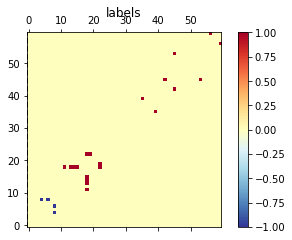

0.982627272606
(60, 60)
Limit: 0.982627272606


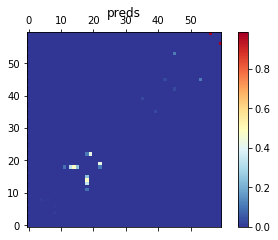

In [21]:
zoomIn_window = (400,460)
NumberOfNodes=2272
plot_prediction(change_scale(preds_chr1_2d)+change_scale(preds_chr1_2d).T, change_scale(labels_chr1_2d)+change_scale(labels_chr1_2d).T, zoomIn_window, )